In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

## Load Iris dataset already embedded in seaborn using Pandas

Note: This already contains the headers in csv and so we need not supply headers like we did with local csv in 01-Iris_Dataset_Analysis

In [80]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
type(iris) # regardless of where we load, this is still a Pandas Dataframe

pandas.core.frame.DataFrame

In [82]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
iris.groupby('species').size() # a sino

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [85]:
# Covariance matrix (This is visualized by pair plot below - 2 types and heatmap)
iris.corr() 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Visualization with Seaborn

1. Hist plot - Kitchen sink, Ungrouped and grouped
2. Ungrouped Pair plot similar to pandas scatter matrix, 
3. Grouped pair plot (where possible. No equivalent in Pandas)
4. Violin Plot
5. Correlation Heat Map
6. Reg Plot (Applicable for continuous dependent variable - unlike here where species is dependent variable)

<AxesSubplot:ylabel='Count'>

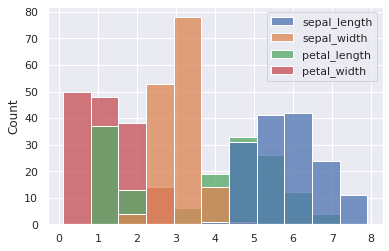

In [86]:
sns.histplot(iris) # mixed histogram for all x - not much useful

<AxesSubplot:xlabel='Count', ylabel='petal_length'>

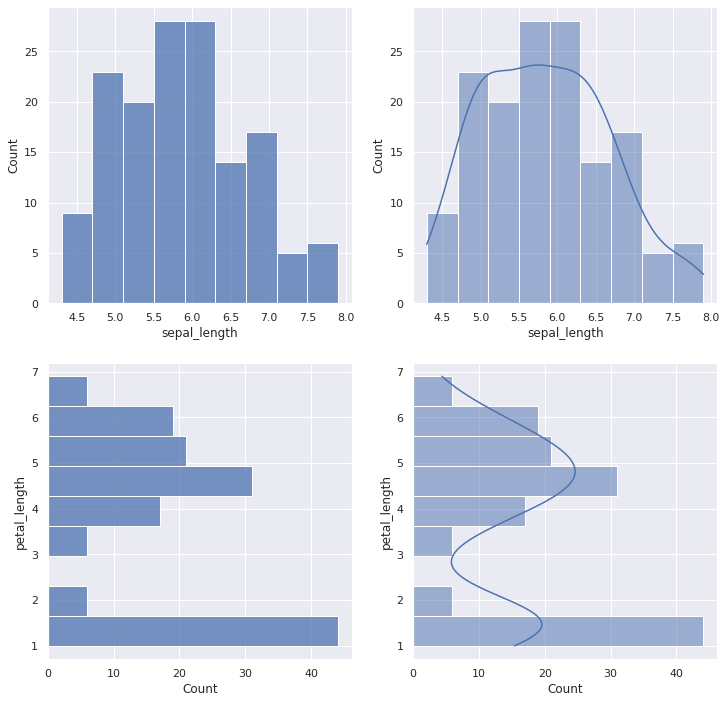

In [87]:
#Multiple type of histplots laid in a nice grid - ALL FOR UNGROUPED

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.histplot(iris, x='sepal_length') #histograms for a given x, ungrouped

plt.subplot(2,2,2)
# histogram for a given x grouped by species
sns.histplot(data=iris, x='sepal_length', kde=True) #histograms for a given x, ungrouped

plt.subplot(2,2,3)
sns.histplot(data=iris, y="petal_length")

plt.subplot(2,2,4)
sns.histplot(data=iris, y="petal_length", kde=True)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

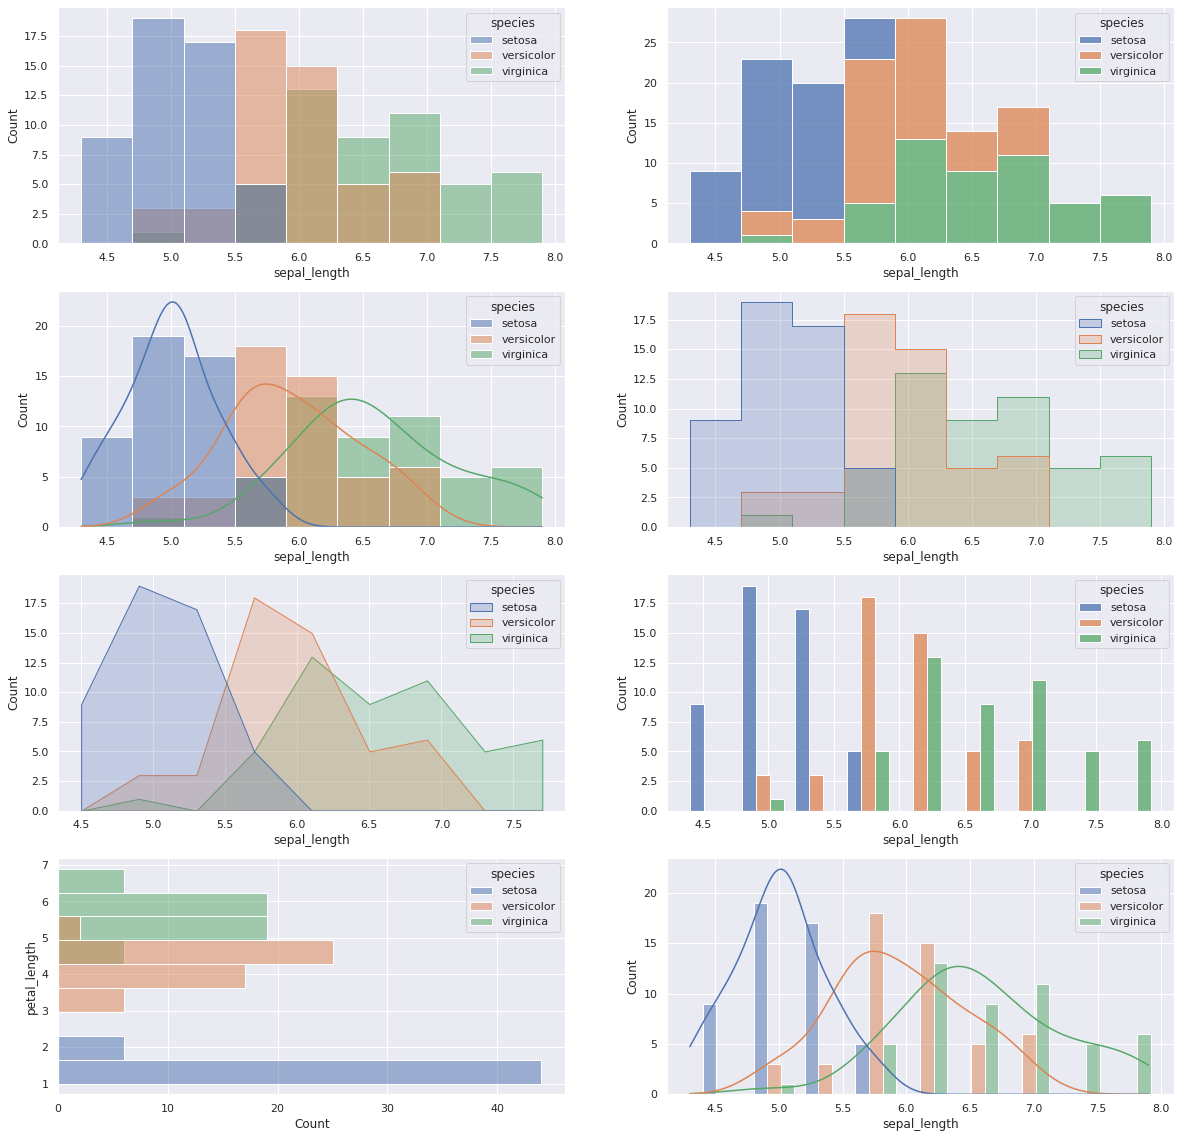

In [88]:
#Multiple type of histplots laid in a nice grid - GROUPED

plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
# histogram for a given x grouped by species
sns.histplot(data=iris, x='sepal_length', hue="species")

plt.subplot(4,2,2)
# histogram for a given x grouped by species
sns.histplot(iris, x='sepal_length', hue="species", multiple="stack")

plt.subplot(4,2,3)
sns.histplot(data=iris, x='sepal_length', hue="species", kde=True)

plt.subplot(4,2,4)
sns.histplot(iris, x="sepal_length", hue="species", element="step")

plt.subplot(4,2,5)
sns.histplot(iris, x="sepal_length", hue="species", element="poly")

plt.subplot(4,2,6)
sns.histplot(data=iris, x="sepal_length", hue="species", multiple="dodge", shrink=.8)

plt.subplot(4,2,7)
# histogram for a given x grouped by species
sns.histplot(data=iris, y="petal_length", hue="species")

plt.subplot(4,2,8)
sns.histplot(data=iris, x="sepal_length", hue="species", multiple="dodge", shrink=.8, kde=True)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

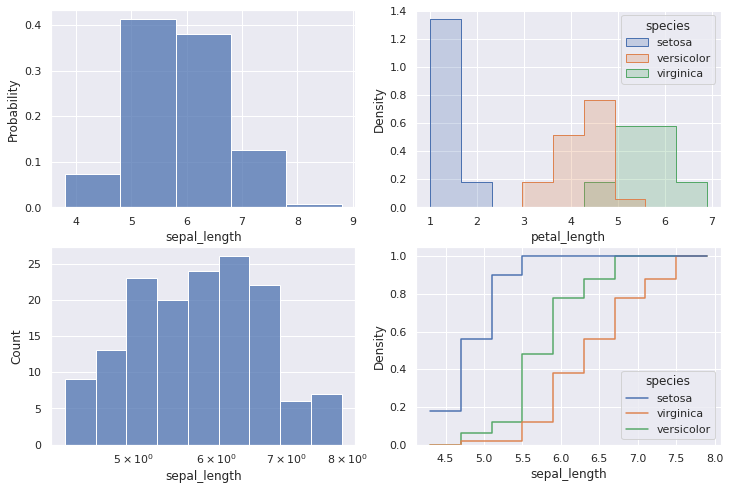

In [89]:
#Multiple type of histplots laid in a nice grid - STATISTICS HIST PLOTS

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
#stat one of count, probability density, ...
sns.histplot(data=iris, x="sepal_length", stat="probability", discrete=True)

plt.subplot(2,2,2)
#Density plot
sns.histplot(
    iris, x="petal_length", hue="species", element="step",
    stat="density", common_norm=False,
)

plt.subplot(2,2,3)
sns.histplot(data=iris, x="sepal_length", log_scale=True) #logScale - good option for high variance in y val plots

plt.subplot(2,2,4)
sns.histplot(
    data=iris, x="sepal_length", hue="species",
    hue_order=["setosa", "virginica", "versicolor"],
    element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)


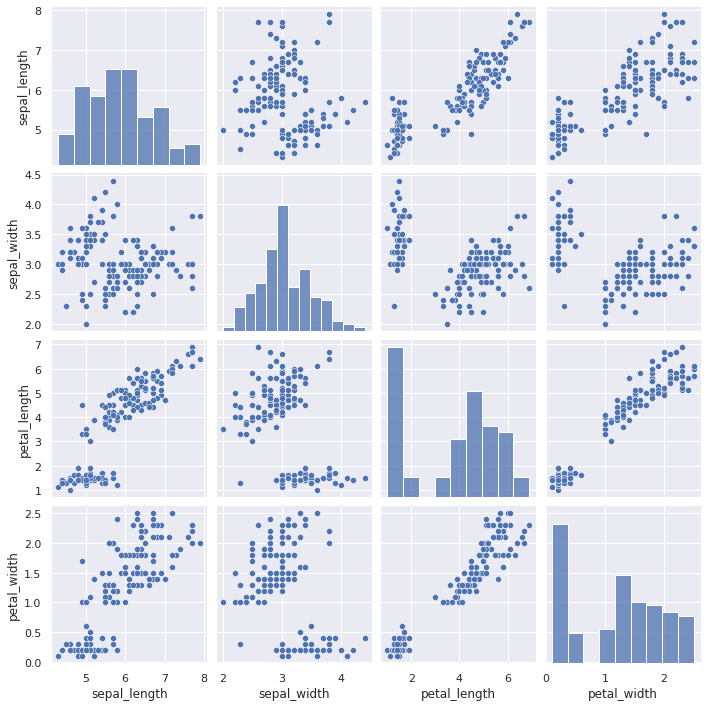

In [90]:
sns.pairplot(iris)

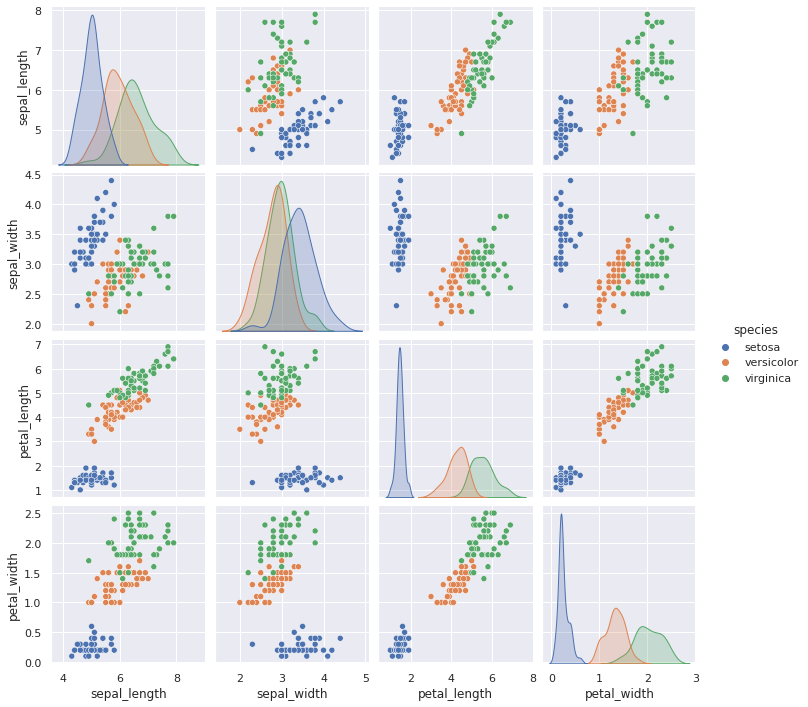

In [91]:
sns.pairplot(iris, hue='species')

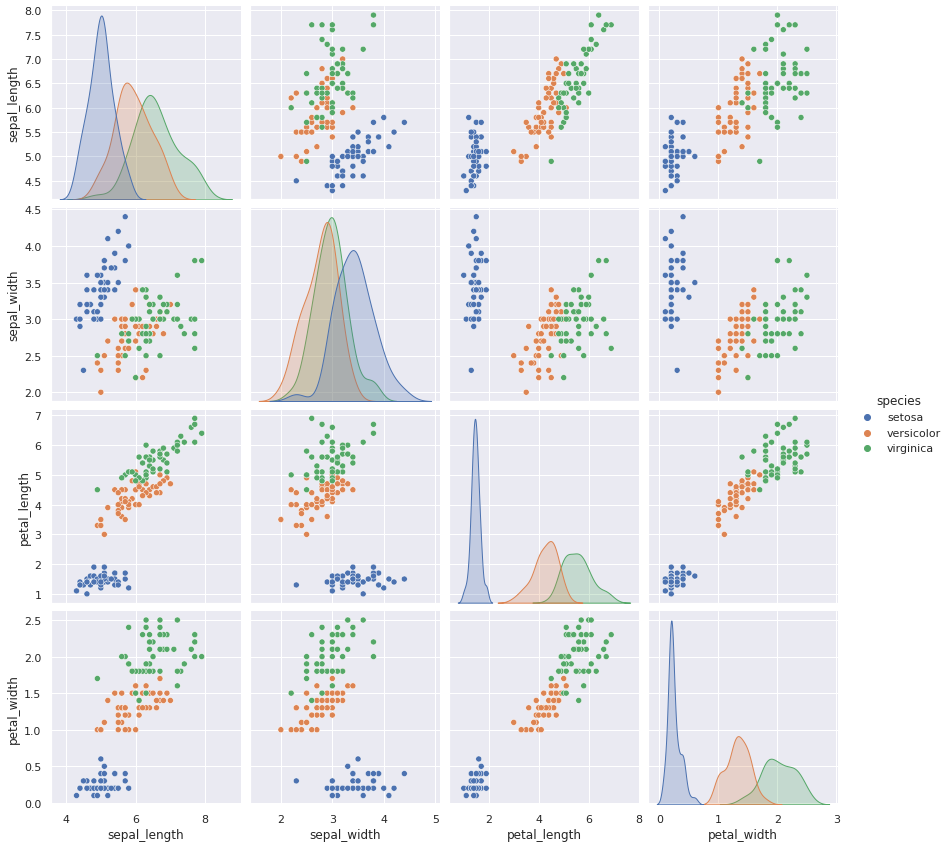

In [92]:
sns.pairplot(iris, hue='species', height=3, aspect=1)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

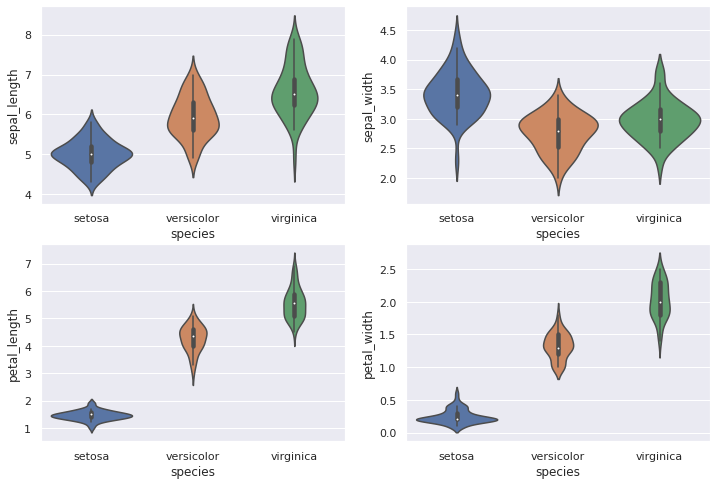

In [101]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=iris)

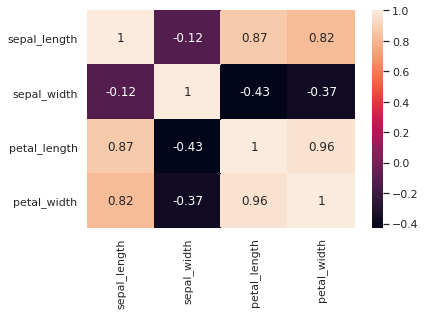

In [94]:
sns.heatmap(iris.corr(), annot=True)
plt.show()

## Matplot Demo

In [95]:
# create some random data
x = np.random.randn(100)
rand_array = np.random.randn(100)
print(type(rand_array))
print(rand_array.shape)
y = 3 * x + rand_array
y

<class 'numpy.ndarray'>
(100,)


array([ 6.616549  ,  3.59750946,  4.76849873, -1.29645948, -2.26394043,
        4.0115646 ,  1.28860444, -3.7026567 , -2.37254688, -3.47177814,
       -5.07897754,  3.34992325, -2.88838376,  1.5194722 ,  0.21460873,
        1.23501978,  0.47853659, -3.55920172, -3.93462957,  0.6625328 ,
        4.95943636, -2.5437586 , -4.03163193,  2.3843496 , -3.70501065,
        1.93396316,  3.88418514, -2.68186984, -0.51548445, -1.33451562,
       -1.17003352, -2.72042773,  6.55283844, -1.427763  ,  1.38690915,
        6.28842443,  4.79569313, -2.09953151,  0.46982778, -0.630204  ,
       -5.08971803, -0.79055158,  2.30141371, -0.73097866,  0.9287822 ,
        3.84447211, -3.58527677,  1.72197949, -1.98409631,  3.42592147,
       -1.89468328,  2.06397414,  1.99367323, -2.52838764,  4.45014614,
        0.2054682 , -5.63971757, -2.61196926, -2.34192072, -2.97673516,
       -1.99902988,  4.17275651,  1.05165906, -1.85499368,  1.43362699,
       -2.44716478, -2.19180389,  2.32693749,  2.39259621,  3.18

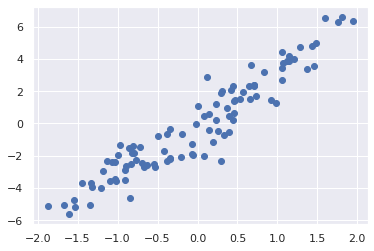

In [96]:
plt.scatter(x,y) #v matplotlib scatter

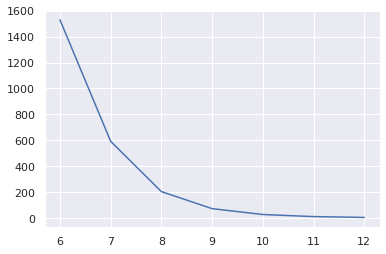

In [97]:
# matplotlib plot
T = np.array([6, 7, 8, 9, 10, 11, 12])
power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])

plt.plot(T,power)
plt.show()

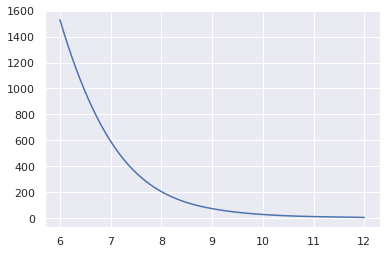

In [98]:

from scipy.interpolate import make_interp_spline, BSpline
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T, power, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

## Reg Plot Demo

<class 'numpy.ndarray'>
(100,)


/home/shrikanth/bin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


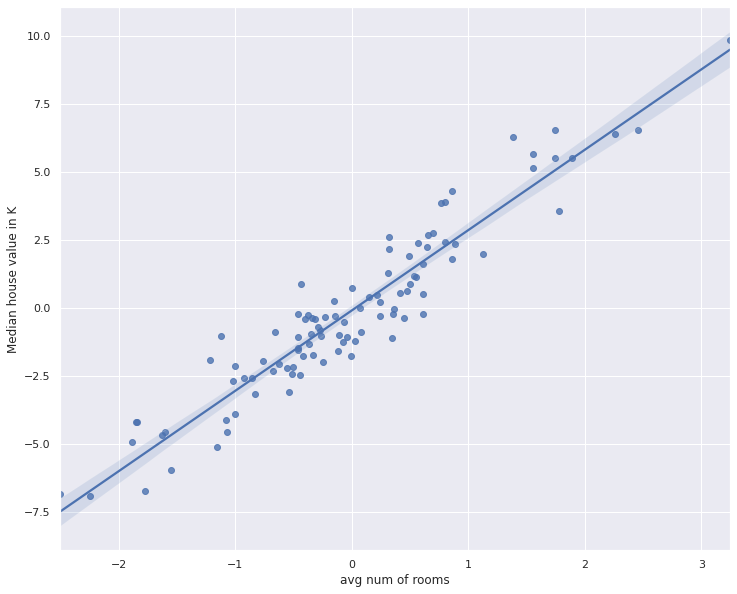

In [99]:
# create some random data
x = np.random.randn(100)
rand_array = np.random.randn(100)
print(type(rand_array))
print(rand_array.shape)
y = 3 * x + rand_array

plt.figure(figsize=(12,10))
sns.regplot(x,y)
plt.xlabel('avg num of rooms')
plt.ylabel('Median house value in K')
plt.show()

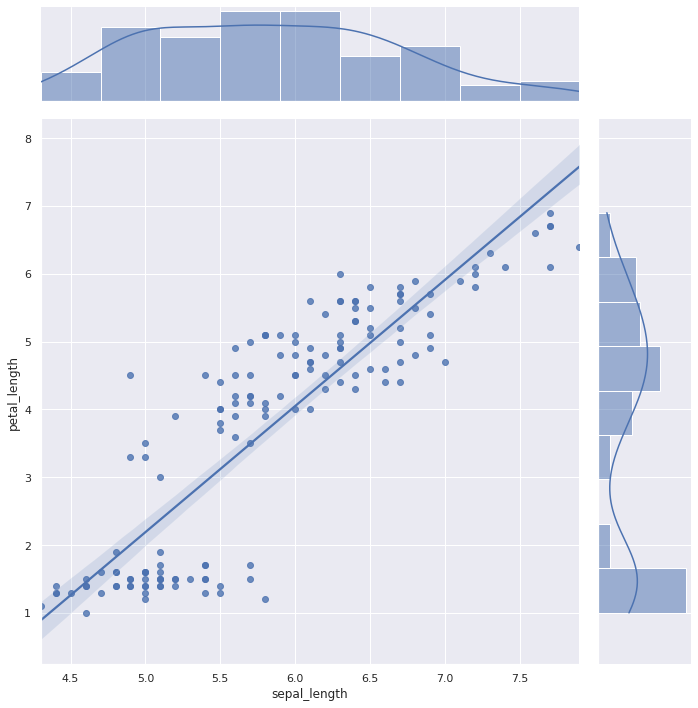

In [100]:
sns.jointplot(x=iris.sepal_length, y=iris.petal_length, data="iris", kind='reg', height=10)
plt.show()